(1025, 16)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target blood_pressure_category  blood_pressure_category_encoded  
0   2     3       0                Elevated                                1  
1   0     3       0                    High                                2  
2   0     3       0                    High                                2  
3   1     3       0                    High                                2  
4   3     2       0                    High                                2  
Original features: 15
Remain

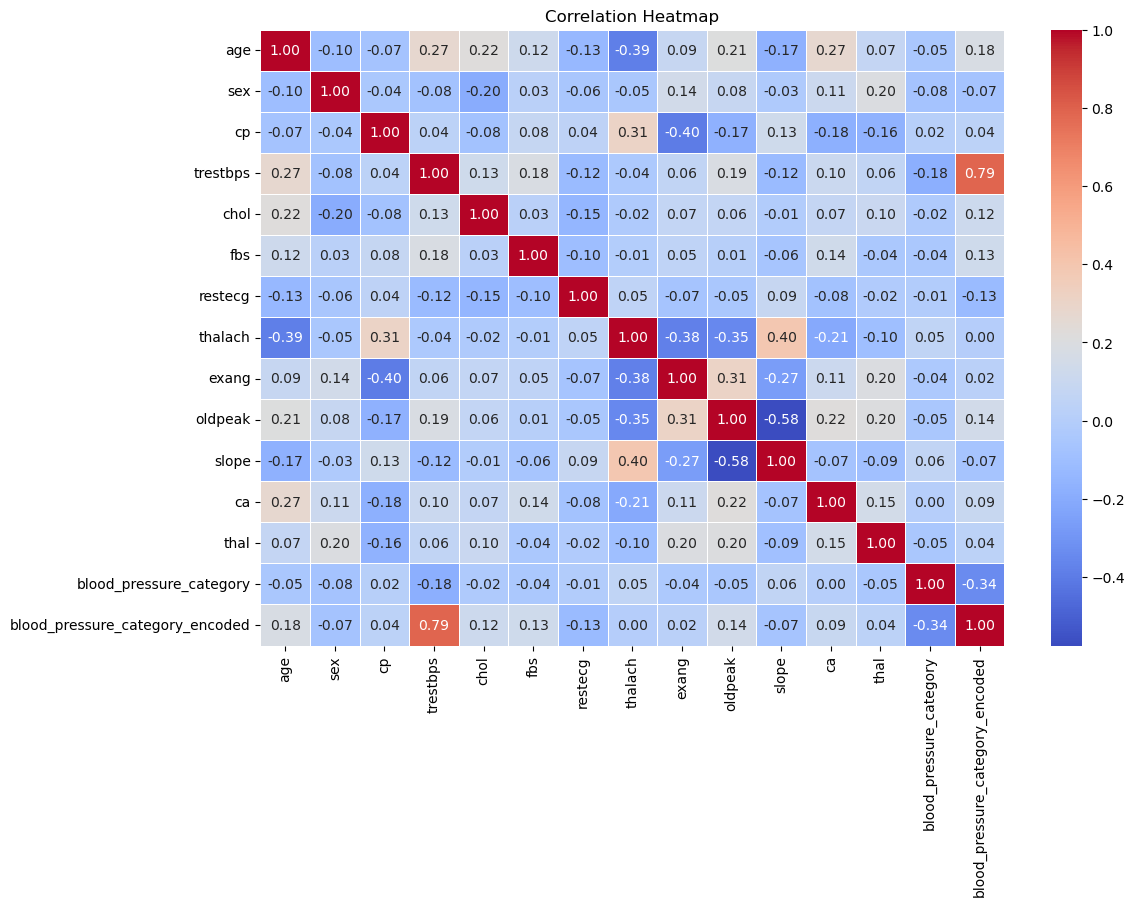

Final dataset saved as 'heart_final_processed.csv'


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("heart_with_bp_feature.csv")

# Print shape and first few rows of the dataframe
print(df.shape)
print(df.head())

# Separate features and target
X = df.drop(columns=['target'])   # Drop the target column
y = df['target']  # Target column

# Handle categorical columns (e.g., 'blood_pressure_category') by encoding them
categorical_columns = X.select_dtypes(include=['object']).columns

# Use LabelEncoder for categorical columns
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Apply Variance Threshold (remove features with low variance)
selector = VarianceThreshold(threshold=0.0)   # start with 0, can increase to 0.01
X_reduced = selector.fit_transform(X)

# Get selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Output the results
print("Original features:", X.shape[1])
print("Remaining features:", X_reduced.shape[1])
print("Selected Features:", list(selected_features))

# 1. Calculate the correlation matrix
corr_matrix = X.corr()

# 2. Plot the heatmap
plt.figure(figsize=(12, 8))  # Size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# final processed dataset
df_final = pd.concat([pd.DataFrame(X_reduced, columns=selected_features), y.reset_index(drop=True)], axis=1)
df_final.to_csv('heart_final_processed.csv', index=False)
print("Final dataset saved as 'heart_final_processed.csv'")